In [8]:
import expected_sarsa_agent as ag
import numpy as np
import mountain_car_environment as enviro
import matplotlib.pyplot as plt
from rl_glue import RLGlue

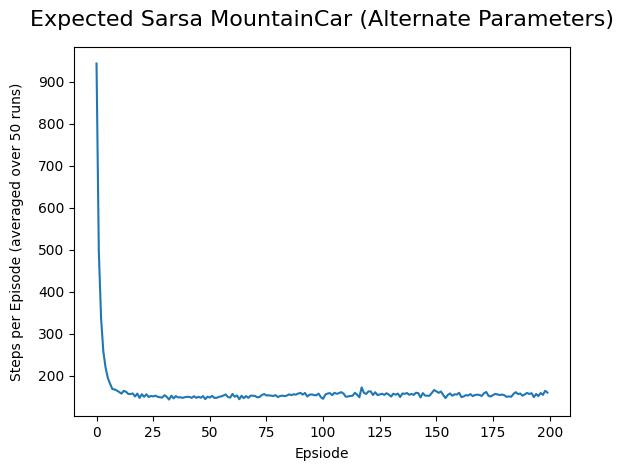

mean:  -32391.34
standard error:  64.24879522605852


In [9]:
def run_experiment(num_runs, num_episodes):
    # Same as last function
    all_steps = []
    agent = ag.ExpectedSarsaAgent
    env = enviro.MountainEnvironment

    total_reward_per_run = []
    for run in range(num_runs):

        initial_weights = np.random.uniform(-0.001, 0)
        agent_info = {
                "num_tilings": 32, "num_tiles": 4, "iht_size": 4096, "epsilon": 0.1, "gamma": 1, 
                "alpha": 0.7/32, "initial_weights": initial_weights, "num_actions": 3
            }
        env_info = {
                "min_position": -1.2, "max_position": 0.5, "min_velocity": -0.07, "max_velocity": 0.07, 
                "gravity": 0.0025, "action_discount": 0.001
            }
        rl_glue = RLGlue(env, agent)
        rl_glue.rl_init(agent_info, env_info)
        steps_per_episode = []

        for episode in range(num_episodes):
            # 15000 is max steps of the episode
            rl_glue.rl_episode(15000)
            steps_per_episode.append(rl_glue.num_steps)
        total_reward = np.sum(steps_per_episode) * -1
        all_steps.append(np.array(steps_per_episode))
        total_reward_per_run.append(total_reward)
    
    data = np.mean(total_reward_per_run)
    data_std_err = np.std(total_reward_per_run, axis=0) / np.sqrt(num_runs)
    plt.title("Expected Sarsa MountainCar", fontdict={'fontsize': 16, 'fontweight' : 25}, pad=15.0)
    plt.xlabel("Epsiode", labelpad=5.0)
    plt.ylabel("Steps per Episode (averaged over " + str(num_runs) + " runs)", labelpad=10.0)
    plt.plot(np.mean(np.array(all_steps), axis = 0))
    plt.show()
    print("mean: ", data)
    print("standard error: ", data_std_err)


def main():
    # set number of runs
    num_runs = 50
    # set number of epsiodes
    num_episodes = 200
    run_experiment(num_runs, num_episodes)

main()